# Classifying 

The data set from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Iris) 


 The dataset description is as follows:

- Data Set: Multivariate
- Attribute: Real
- Associated Tasks: Classification
- Number of Instances: 214
- Number of Attributes: 10
- Missing Values?: No


### Attribute Information:

   1. Id number: 1 to 214
   2. RI: refractive index
   3. Na: Sodium 
   4. Mg: Magnesium
   5. Al: Aluminum
   6. Si: Silicon
   7. K: Potassium
   8. Ca: Calcium
   9. Ba: Barium
  10. Fe: Iron
  11. Type of glass 
 




## Data Exploration 

In this section we will begin to explore the dataset to determine relevant information.

In [29]:
%matplotlib notebook
import missingno as msno
import os
import json
import time
import pickle
import requests

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.features import Rank1D
from yellowbrick.features import Rank2D
from yellowbrick.classifier import ClassificationReport
from yellowbrick.features.importances import FeatureImportances


In [4]:
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"


def fetch_data(fname='glass.csv'):
    
    response = requests.get(URL)
    outpath  = os.path.abspath(fname)
    with open(outpath, 'wb') as f:
        f.write(response.content)
    
    return outpath

# Fetch the data if required
DATA = fetch_data()

In [5]:
df = pd.read_csv('glass.csv')
df.head(5)

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [18]:
FEATURES = [
    'Id number',
     'RI',
     'Na',
     'Mg',
     'Al'
     'Si',
     'K',
     'Ca',
     'Ba',
     'Fe',
     'Type of glass'
    
]

LABEL_MAP = {
          1:'building_windows_float_processed',
          2:'building_windows_non_float_processed',
          3:'vehicle_windows_float_processed',
          4:'vehicle_windows_non_float_processed',
          5:'containers',
          6:'tableware',
          7:'headlamps',

}


# Read the data into a DataFrame
df = pd.read_csv(DATA, header=None, names=FEATURES)

# Convert class labels into text
df['Type of glass'] = df['Type of glass'].map(LABEL_MAP)

# Describe the dataset
print(df.describe())




        Id number          RI          Na          Mg        AlSi           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516523   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe  
count  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009  
std      1.423153    0.497219    0.097439  
min      5.430000    0.000000    0.000000  
25%      8.240000    0.000000    0.000000  
50%   

<IPython.core.display.Javascript object>


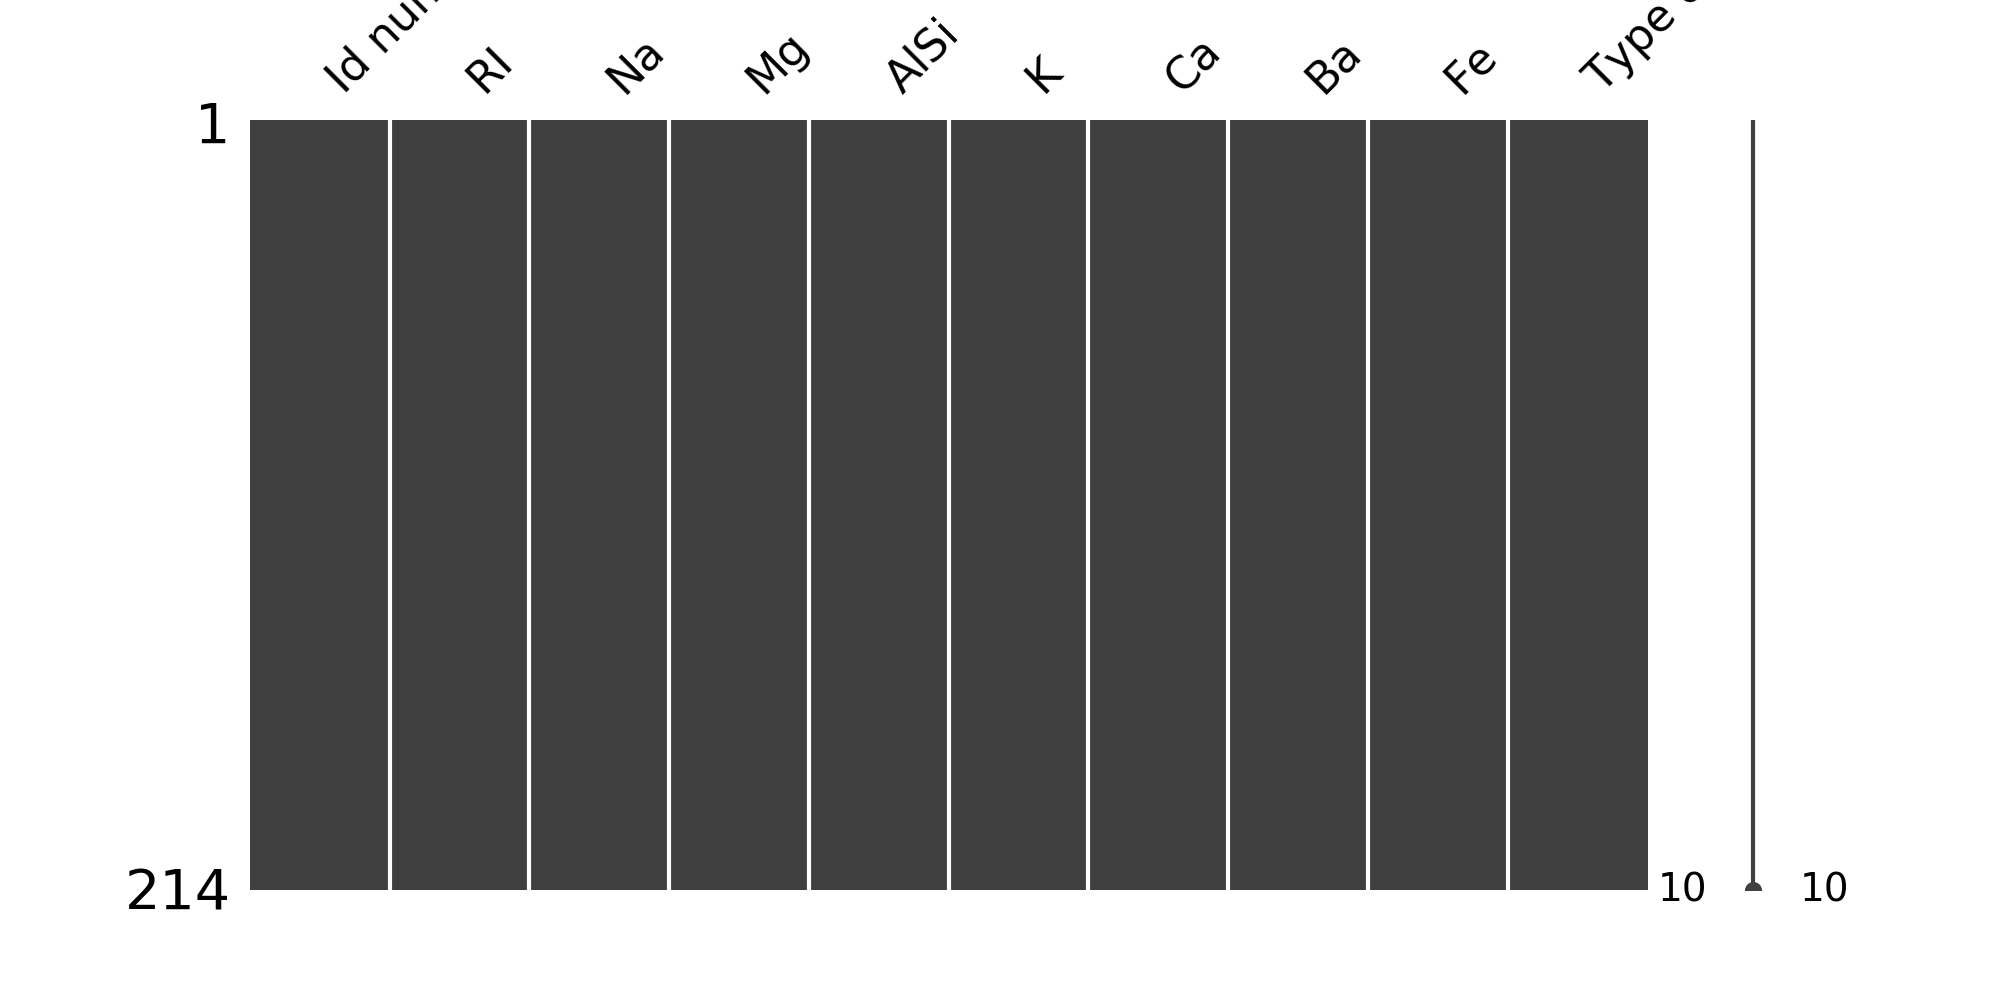

In [21]:
#Visualizing the location of missing values
msno.matrix(df, figsize = (10,5))

In [25]:
# Determine the shape of the data
print("{} instances with {} features\n".format(*df.shape))

# Determine the frequency of each class
print(df.groupby('Type of glass')['Type of glass'].count())

214 instances with 10 features

Type of glass
building_windows_float_processed        70
building_windows_non_float_processed    76
containers                              13
headlamps                               29
tableware                                9
vehicle_windows_float_processed         17
Name: Type of glass, dtype: int64


In [26]:
from sklearn.preprocessing import LabelEncoder

# Extract our X and y data
X = df[FEATURES[:-1]]
y = df['Type of glass']

# Encode our target variable
encoder = LabelEncoder().fit(y)
y = encoder.transform(y)

print(X.shape, y.shape)

(214, 9) (214,)


### Feature Selection

<IPython.core.display.Javascript object>


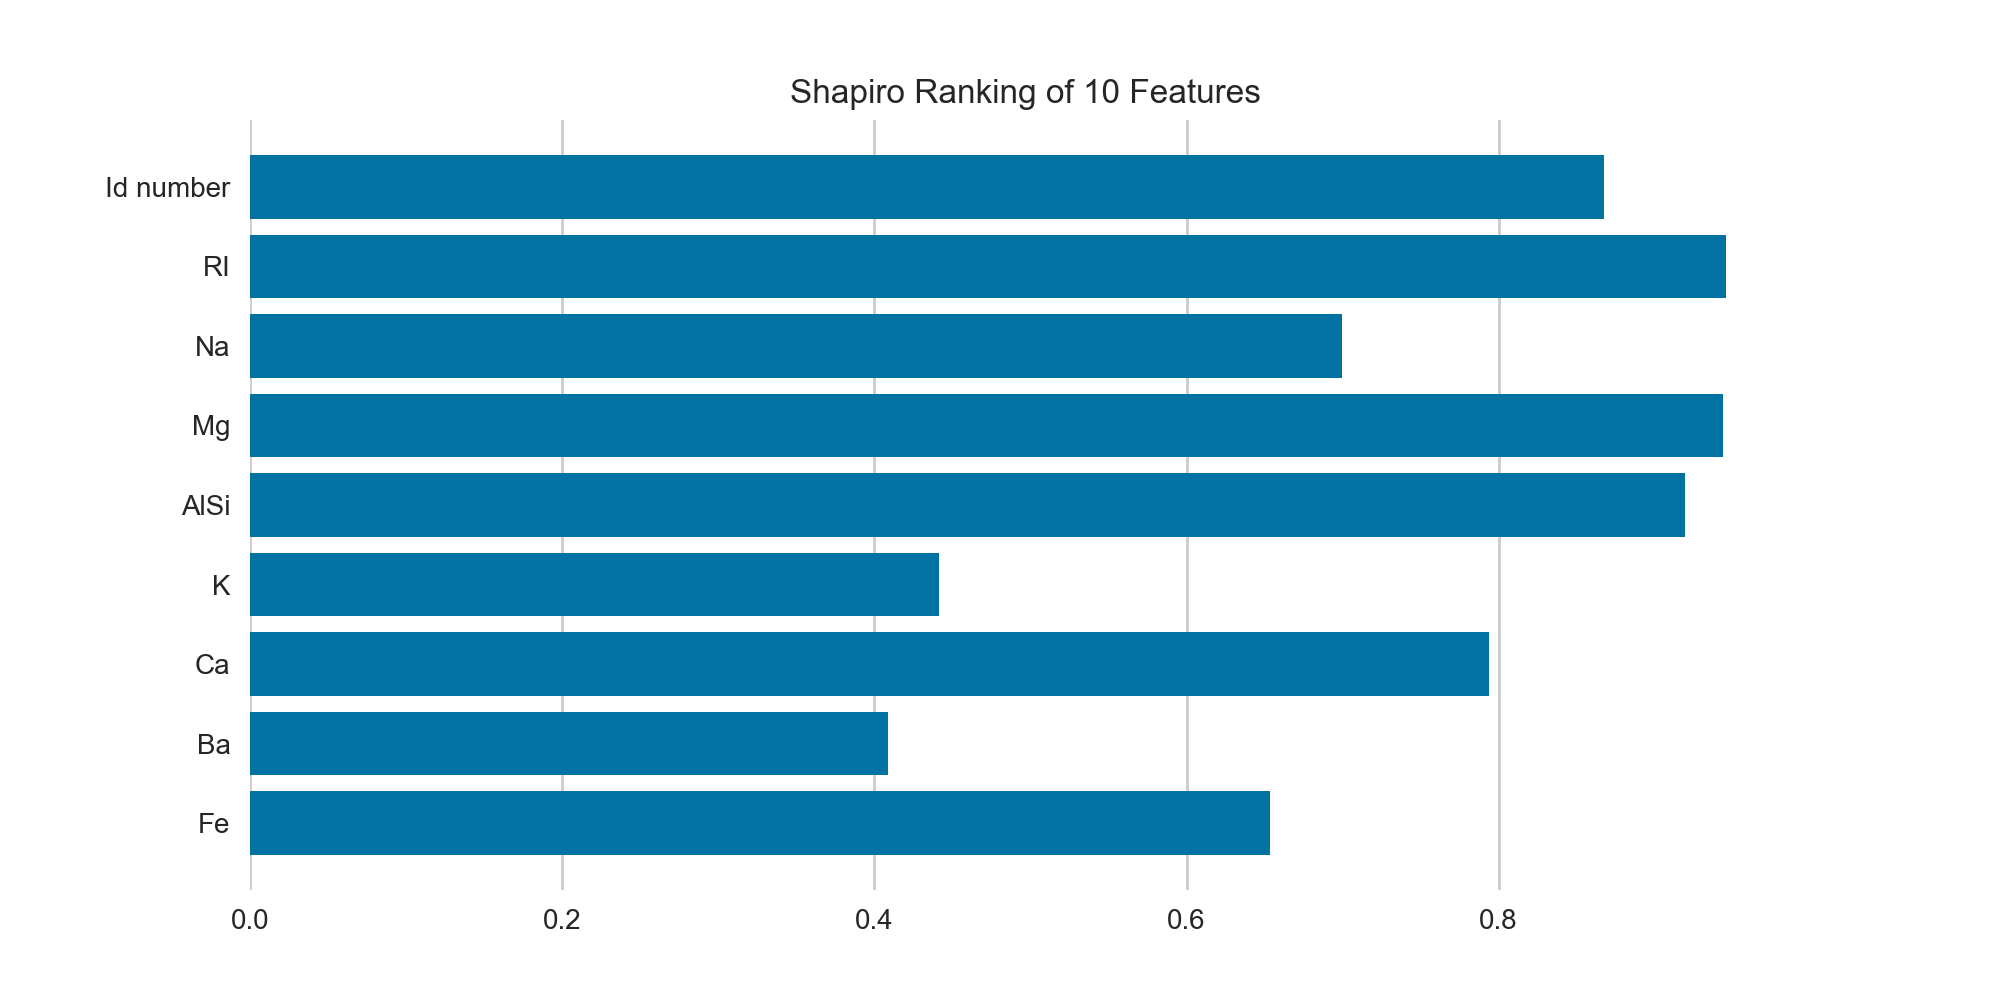

In [31]:
# Creating 1D visualizer with the Sharpiro feature ranking algorithm
fig, ax = plt.subplots(figsize=(10, 5))
visualizer = Rank1D(features=features, ax=ax, algorithm='shapiro')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()